#**PyTorch II**
Autor: Jheremy Reyes,

estudiante de matemáticas,

Universidad El Bosque

**Introducción a las Operaciones en PyTorch: El Corazón del Deep Learning Moderno**

PyTorch se ha consolidado como uno de los frameworks más poderosos para deep learning gracias a su diseño flexible y su rico conjunto de operaciones tensoriales. Estas operaciones —que van desde simples cálculos aritméticos hasta complejas transformaciones matriciales— forman los cimientos sobre los cuales se construyen modelos de inteligencia artificial avanzados. A diferencia de otros frameworks, PyTorch integra estas capacidades con una API intuitiva y la magia del cálculo diferencial automático (autograd), permitiendo prototipado rápido sin sacrificar rendimiento.



**¿Qué son las Operaciones en PyTorch?**
Las operaciones son funciones matemáticas que transforman tensores (arrays multidimensionales) preservando su estructura y permitiendo:

Cálculos numéricos eficientes (usando CPU/GPU/TPU)

Propagación automática de gradientes para entrenamiento de modelos

Composición modular de operaciones para construir grafos computacionales dinámicos

El siguiente bloque de código representa la inicialización estándar para cualquier proyecto en PyTorch, donde se importan las bibliotecas esenciales y se configura el entorno de ejecución. A continuación, se detalla cada componente:

In [ ]:
# Importaciones esenciales
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Magic command para gráficos embebidos (debe ir en su propia línea, sin comentarios después)
%matplotlib inline

# Configuración adicional
from torch.utils.data import DataLoader, Dataset
import os
from tqdm import tqdm

# Verificación de GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDispositivo de ejecución: {device}")


Dispositivo de ejecución: cpu


**torch:** Biblioteca central que proporciona tensores (estructuras de datos multidimensionales) y operaciones básicas para cómputo numérico acelerado (CPU/GPU).

**torch.nn (nn)**: Módulo que contiene clases predefinidas para construir arquitecturas de redes neuronales (ej. Linear, Conv2d, LSTM).

**torch.optim (optim):** Implementa algoritmos de optimización (ej. SGD, Adam) para el entrenamiento de modelos.

**torch.nn.functional (F)**: Ofrece funciones de activación (ej. ReLU, softmax) y operaciones sin estado (stateless).

In [ ]:
import torch

# Crear tensores en PyTorch
a = torch.tensor([[1, 2],
                   [3, 4]], dtype=torch.int32)

b = torch.ones([2, 2], dtype=torch.int32)

# Imprimir los tensores
print("a:\n", a, "\n")
print("b:\n", b, "\n")

# Operaciones en PyTorch
print("Miremos algunas operaciones:\n")

# Suma de tensores
print("Suma:\n", torch.add(a, b), "\n")

# Multiplicación elemento por elemento
print("Multiplicación elementwise:\n", torch.mul(a, b), "\n")

# Multiplicación de matrices
print("Multiplicación de matrices:\n", torch.matmul(a, b), "\n")

a:
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32) 

b:
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 

Miremos algunas operaciones:

Suma:
 tensor([[2, 3],
        [4, 5]], dtype=torch.int32) 

Multiplicación elementwise:
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32) 

Multiplicación de matrices:
 tensor([[3, 3],
        [7, 7]], dtype=torch.int32) 



In [ ]:
c = torch.tensor([[4, 5], [10, 1]], dtype=torch.int32)
print("b + c:\n", b + c, "\n")

b + c:
 tensor([[ 5,  6],
        [11,  2]], dtype=torch.int32) 



In [ ]:
c = torch.tensor([[4.0, 5.0], [10.0, 1.0]], dtype=torch.float64)
print("Valor máximo de c:", torch.max(c).item())

Valor máximo de c: 10.0


In [ ]:
# Máximo a lo largo de las filas (axis=0 en TensorFlow)
print("Máximo a lo largo de las filas:", torch.max(c, dim=0).values)

# Máximo a lo largo de las columnas (axis=1 en TensorFlow)
print("Máximo a lo largo de las columnas:", torch.max(c, dim=1).values)

Máximo a lo largo de las filas: tensor([10.,  5.], dtype=torch.float64)
Máximo a lo largo de las columnas: tensor([ 5., 10.], dtype=torch.float64)


**Aplicación y Visualización de la Función ReLU**

Este fragmento de código ilustra un flujo de trabajo típico en PyTorch para:

- Generar datos aleatorios,

- Aplicar una función de activación clave en redes neuronales, y

- Visualizar los resultados.

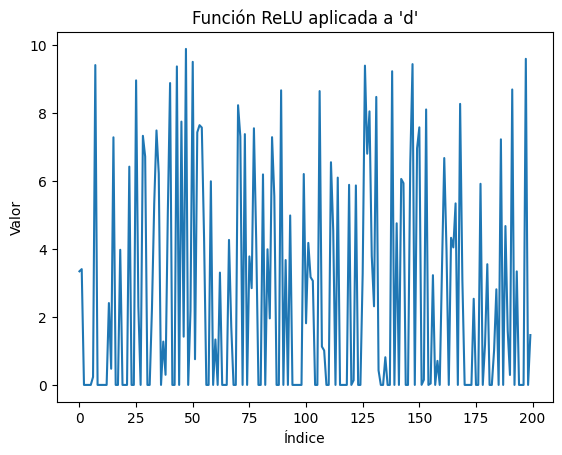

In [ ]:
# Generar un tensor con valores aleatorios uniformes
d = torch.empty(200).uniform_(-10.0, 10.0)

# Aplicar la función ReLU
relu_d = torch.relu(d)

# Graficar los valores
plt.plot(relu_d.numpy())
plt.title("Función ReLU aplicada a 'd'")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.show()

**Relevancia en Deep Learning**
**Propósito de ReLU:**

Introduce no-linealidad en redes neuronales.

Mitiga el problema del vanishing gradient (comparado con sigmoid/tanh).

**Uso típico:**

Capas ocultas en CNNs y MLPs.

Implementada como F.relu() o nn.ReLU() en PyTorch.

**Propiedades**

**Creación y Análisis de un Tensor de Rango 4**

El siguiente código demuestra cómo crear un tensor multidimensional en PyTorch y examinar sus propiedades fundamentales. Esta operación es esencial para trabajar con datos complejos en deep learning, como imágenes en batch o secuencias temporales.

In [ ]:
# Crear un tensor de rango 4 lleno de ceros
rank_4_tensor = torch.zeros([3, 2, 4, 5])

# Propiedades del tensor
print("Tensor de rango 4:\n", rank_4_tensor)
print("\nForma del tensor (shape):", rank_4_tensor.shape)
print("Número de dimensiones (rank):", len(rank_4_tensor.shape))
print("Número total de elementos:", rank_4_tensor.numel())
print("Tipo de dato (dtype):", rank_4_tensor.dtype)

Tensor de rango 4:
 tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

Forma del tensor (shape): torch.Size([3, 2, 4, 5])
Número de dimensiones (rank): 4
Número total de elementos: 120
Tipo de dato (dtype): torch.float32


**Creación del tensor:**

torch.zeros([3, 2, 4, 5]) genera un tensor de 4 dimensiones (rango 4) lleno de ceros, con forma (3, 2, 4, 5).

Esta estructura podría representar, por ejemplo:

- 3 lotes de datos

- Cada lote contiene 2 canales (como imágenes RGB)

- Cada canal tiene 4 filas y 5 columnas

**Aplicaciones prácticas:**
**Visión por computadora:** Tensores rank-4 son comunes para batches de imágenes (batch, canales, altura, ancho).

**Procesamiento de secuencias:** Pueden modelar (batch, pasos temporales, características, embeddings).

In [ ]:
# Crear un tensor de rango 4 lleno de ceros
rank_4_tensor = torch.zeros([3, 2, 4, 5])

# Propiedades del tensor
print("Rango (número de dimensiones):", len(rank_4_tensor.shape))  # Equivalente a tf.rank
print("Tipo de elemento:", rank_4_tensor.dtype)
print("Número de ejes o dimensiones:", rank_4_tensor.ndim)
print("Tamaño del tensor (shape):", rank_4_tensor.shape)
print("Elementos en el eje 0 del tensor:", rank_4_tensor.shape[0])
print("Elementos en el último eje del tensor:", rank_4_tensor.shape[-1])
print("Tamaño total de elementos (3*2*4*5):", rank_4_tensor.numel())

Rango (número de dimensiones): 4
Tipo de elemento: torch.float32
Número de ejes o dimensiones: 4
Tamaño del tensor (shape): torch.Size([3, 2, 4, 5])
Elementos en el eje 0 del tensor: 3
Elementos en el último eje del tensor: 5
Tamaño total de elementos (3*2*4*5): 120


**Reshape**

**Introducción a la Operación reshape en PyTorch: Concepto e Importancia**

En PyTorch, reshape es una operación fundamental que permite reorganizar los elementos de un tensor en una nueva forma (shape) sin modificar sus datos subyacentes. Esta función garantiza que el número total de elementos (numel) se mantenga constante, cumpliendo la siguiente regla:

numel
(
tensor_original
)
=
numel
(
tensor_redimensionado
)
numel(tensor_original)=numel(tensor_redimensionado)

**Importancia en Deep Learning**

**Adaptabilidad de Datos**

Permite ajustar tensores para que sean compatibles con las capas de una red neuronal.

Ejemplo: Convertir un tensor de imágenes 3D (batch, altura, ancho) a 2D (batch, altura*ancho) para una capa Linear.

**Eficiencia en Operaciones**

Optimiza el cómputo al reorganizar datos para operaciones matriciales (ej: matmul).

Ejemplo: Redimensionar un tensor (4, 5) a (5, 4) para multiplicación de matrices.

**Manejo de Lotes (Batches)**

Facilita el procesamiento de batches irregulares o la concatenación de tensores.

**Compatibilidad con Hardware**

Asegura que los tensores tengan formas óptimas para aceleración en GPU/TPU.

In [ ]:
# Tensor original (12 elementos)
tensor_original = torch.arange(12)  # [0, 1, 2, ..., 11]

# Redimensionar a 3x4
tensor_reshaped = tensor_original.reshape(3, 4)

print("Original (1D):\n", tensor_original)
print("\nReshaped (3x4):\n", tensor_reshaped)

Original (1D):
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Reshaped (3x4):
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
# Crear un tensor de rango 3 (3 dimensiones)
rank_3_tensor = torch.tensor([
    [[1, 2, 3], [4, 5, 6]],
    [[7, 8, 9], [10, 11, 12]],
    [[13, 14, 15], [16, 17, 18]]
])

# Imprimir el tensor original
print("Tensor original:\n", rank_3_tensor)

# Cambiar la forma del tensor (reshape)
reshaped_tensor = rank_3_tensor.reshape(2, 3, 3)  # Nueva forma: (2, 3, 3)
print("\nTensor después de reshape:\n", reshaped_tensor)

Tensor original:
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])

Tensor después de reshape:
 tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])


In [ ]:
print(torch.reshape(rank_3_tensor, (-1,)))

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


In [ ]:
print(torch.reshape(rank_3_tensor, (3, -1)))

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18]])


In [ ]:
# Crear el tensor
a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Imprimir el tensor original
print("Tensor original (a):\n", a)

# Repetir a lo largo de las columnas (eje 1)
b = a.repeat(1, 2)
print("\nRepetido a lo largo de las columnas (b):\n", b)

# Repetir a lo largo de las filas y columnas (ejes 0 y 1)
c = a.repeat(2, 3)
print("\nRepetido a lo largo de filas y columnas (c):\n", c)

Tensor original (a):
 tensor([[1., 2.],
        [3., 4.]])

Repetido a lo largo de las columnas (b):
 tensor([[1., 2., 1., 2.],
        [3., 4., 3., 4.]])

Repetido a lo largo de filas y columnas (c):
 tensor([[1., 2., 1., 2., 1., 2.],
        [3., 4., 3., 4., 3., 4.],
        [1., 2., 1., 2., 1., 2.],
        [3., 4., 3., 4., 3., 4.]])


**Broadcasting**

El broadcasting es un mecanismo fundamental en PyTorch (y NumPy) que permite realizar operaciones entre tensores de diferentes formas automáticamente, sin necesidad de replicar manualmente los datos. Aquí los puntos clave:

**Definición**
El broadcasting expande tensores de menor rango para que coincidan con la forma del tensor más grande en una operación, siguiendo reglas predefinidas.

**Objetivo:** Evitar copias explícitas de datos y simplificar operaciones aritméticas.

**Reglas del Broadcasting**
PyTorch compara las dimensiones de los tensores de derecha a izquierda y aplica:

- Igualdad de dimensiones: Si dos dimensiones son iguales, se opera directamente.

- Dimensión 1: Si una dimensión es 1, se "estira" para igualar la otra.

- Dimensión faltante: Si un tensor tiene menos dimensiones, se añaden dimensiones 1 a la izquierda.

In [ ]:
# Crear los tensores
x = torch.tensor([1, 2, 3])
y = torch.tensor(3)
z = torch.tensor([3, 3, 3])

# Realizar las multiplicaciones
print("Multiplicación con escalar (tf.multiply(x, 3)):\n", x * 3)
print("Multiplicación con tensor escalar (x * y):\n", x * y)
print("Multiplicación con tensor (x * z):\n", x * z)

Multiplicación con escalar (tf.multiply(x, 3)):
 tensor([3, 6, 9])
Multiplicación con tensor escalar (x * y):
 tensor([3, 6, 9])
Multiplicación con tensor (x * z):
 tensor([3, 6, 9])


In [ ]:
# Crear los tensores
a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
b = torch.tensor([[1.0], [2.0]])

# Repetir el tensor b a lo largo de las columnas
d = b.repeat(1, 2)

# Sumar tensores
c = a + b
e = a + d

# Imprimir resultados
print("Resultado de a + b (c):\n", c)
print("Resultado de a + d (e):\n", e)

Resultado de a + b (c):
 tensor([[2., 3.],
        [5., 6.]])
Resultado de a + d (e):
 tensor([[2., 3.],
        [5., 6.]])


**Ragged, string & Sparse**

**Ragged Tensors (Tensores Irregulares)**

**Definición:** Tensores donde las dimensiones tienen longitudes variables (ej: secuencias de texto con distinto número de palabras).

Características:

- No están soportados nativamente en PyTorch (a diferencia de TensorFlow).

Alternativas:

- Usar listas de tensores de 1D (List[torch.Tensor]).

- Rellenar con valores especiales (padding) para crear tensores regulares.

- Emplear máscaras para ignorar valores de relleno.

In [ ]:
sequences = [torch.tensor([1, 2, 3]), torch.tensor([4, 5])]  # Lista de tensores irregulares
padded = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True)

**Uso típico**: Procesamiento de lenguaje natural (NLP) o datos temporales de longitud variable.

**String Tensors (Tensores de Cadenas)**
**Definición**: Tensores que almacenan datos de texto (cadenas de caracteres).
Situación en PyTorch:

No existe un tipo dtype para strings nativo en tensores PyTorch.

Alternativas:

- Codificar manualmente (ej: one-hot, embeddings).

- Usar extensiones como torchtext para manejar texto.

- Trabajar con tensores numéricos (índices de vocabulario).

In [ ]:
text_data = ["hello", "world"]
# Convertir a índices numéricos
vocab = {"hello": 0, "world": 1}
encoded = torch.tensor([vocab[word] for word in text_data])

**Limitaciones**: Requiere preprocesamiento para convertir texto a números

**Sparse Tensors (Tensores Dispersos)**

**Definición**: Tensores que almacenan principalmente valores cero de manera eficiente (solo guardan valores no cero).

Características:

Formatos comunes: COO, CSR, CSC.

Ahorran memoria y cómputo en operaciones matriciales.

In [ ]:
indices = torch.tensor([[0, 1], [2, 3]])  # Posiciones de valores no cero
values = torch.tensor([1.5, 2.5])         # Valores
sparse_tensor = torch.sparse_coo_tensor(indices, values, size=(4, 4))

**Operaciones soportadas:**

Multiplicación matriz-vector (torch.sparse.mm).

Conversión a denso (sparse_tensor.to_dense()).

**Uso típico:**

Procesamiento de grafos (matrices de adyacencia).

NLP (bag-of-words).

Sistemas de recomendación.

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]
]

print("Lista irregular (ragged list):\n", ragged_list)

Lista irregular (ragged list):
 [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]


In [ ]:
# Lista de cadenas de texto
tensor_strings = ["Bienvenidos",
                  "al",
                  "curso de:",
                  "TensorFlow 2",
                  "para Deep Learning",
                  "🥳👍"]

# Número de buckets
num_buckets = 10

# Función para asignar cada cadena a un bucket
def to_hash_bucket(strings, num_buckets):
    return [hash(s) % num_buckets for s in strings]

# Aplicar la función
word_buckets = to_hash_bucket(tensor_strings, num_buckets)

# Imprimir el resultado
print("Buckets asignados a cada cadena:\n", word_buckets)

Buckets asignados a cada cadena:
 [2, 0, 6, 9, 4, 1]


In [ ]:
# IDs de las palabras (índices)
ids = torch.tensor([0, 0])

# Buckets de las palabras (equivalente a los embeddings)
word_buckets = torch.tensor([5, 3, 7, 8, 2, 9])

# Crear una capa de embedding
embedding_layer = nn.Embedding(num_embeddings=len(word_buckets), embedding_dim=1)

# Asignar los buckets como pesos de la capa de embedding
embedding_layer.weight = nn.Parameter(word_buckets.float().unsqueeze(1))

# Realizar la búsqueda de embeddings
word_embeddings = embedding_layer(ids)

# Imprimir el resultado
print("Embeddings buscados:\n", word_embeddings)

Embeddings buscados:
 tensor([[5.],
        [5.]], grad_fn=<EmbeddingBackward0>)
